装饰器允许通过将现有函数传递给装饰器，从而向现有函数添加一些额外的功能，该装饰器将执行现有函数的功能和添加的额外功能。

我们将编写一个装饰器，该装饰器会在调用另一个函数时记录日志。

编写装饰器函数logging。它接受一个函数func作为参数。它还定义了一个名为log_function_called的函数，它先执行打印出一些“函数func被调用”的信息（print(f'{func} called.')），然后调用函数func()。最后返回定义的函数。

def logging(func):
  def log_function_called():
    print(f'{func} called.')
    func()
  return log_function_called

让我们编写其他两个函数，我们最终会将装饰器添加到其中（但还没有）。

def my_name():
  print('chris')def friends_name():
  print('naruto')my_name()
friends_name()
#=> chris
#=> naruto


现在将装饰器添加到上面编写的两个函数之中。

@logging
def my_name():
 print('chris')@logging
def friends_name():
 print('naruto')my_name()
friends_name()
#=> <function my_name at 0x10fca5a60> called.
#=> chris
#=> <function friends_name at 0x10fca5f28> called.
#=> naruto


现在，你了解了如何仅仅通过在其上面添加@logging（装饰器），就能够轻松地将日志添加到我们编写的任何函数中。

什么是装饰器(decorator)

简单来说，可以把装饰器理解为一个包装函数的函数，它一般将传入的函数或者是类做一定的处理，返回修改之后的对象．所以，我们能够在不修改原函数的基础上，在执行原函数前后执行别的代码．比较常用的场景有日志插入，事务处理等．

装饰器

最简单的函数，返回两个数的和

In [1]:
def calc_add(a,b):
    return a+b
calc_add(1,2)

3

但是现在又有新的需求，计算求和操作耗时，很简单，求和前获取一下时间，求和后再获取一次，求差即可

In [2]:
import datetime
def calc_add(a, b):
    start_time = datetime.datetime.now()
    result = a + b
    end_tiem = datetime.datetime.now()
    print ("result:", result, "used:", (end_tiem - start_time).microseconds, "μs")
    return result
calc_add(1, 2)

result: 3 used: 0 μs


3

现在呢，函数calc_diff(a, b)，计算a-b，也想计算减法操作的时间差，很好办，把那段代码复制过去．但是假如我们现在想编的是一个数学函数库，各种函数都想计算其执行耗时，总不能一个一个复制代码，想个更好的办法．

我们知道，在Python中函数也是被视为对象的，可以作为参数传递，那么假如把计算耗时的独立为一个单独的函数calc_spend_time()，然后把需要计算耗时的函数例如calc_add的引用传递给它，在calc_spend_time中调用calc_add，这样所有的需要计算耗时的函数都不用修改自己的代码了．

In [3]:
def calc_spend_time(func, *args, **kargs):
    start_time = datetime.datetime.now()
    result = func(*args, **kargs)
    end_tiem = datetime.datetime.now()
    print ("result:", result, "used:", (end_tiem - start_time).microseconds, "μs")
def calc_add(a, b):
    return a + b
calc_spend_time(calc_add, 1, 1)
# calc_spend_time(calc_add, a=1, b=2)

result: 2 used: 0 μs


看起来也不错，负责计算的函数不用更改，只需调用的时候作为参数传给计算时间差的函数．但就是这，调用的时候形式变了，不再是clac(1, 2)，而是calc_spend_time(clac_add, 1, 2)，万一calc_add大规模被调用，那么还得一处一处找，然后修改过来，还是很麻烦．如果想不修改代码，就得使clac()和calc_spend_time(clac)效果一样，那么可以在calc_spend_time()里把传入的clac包装一下，然后返回包装后的新的函数，再把返回的包装好的函数赋给clac，那么calc()的效果就和上例calc_spend_time(calc())效果一样．

我们将编写一个装饰器，该装饰器会在调用另一个函数时记录日志。

编写装饰器函数logging。它接受一个函数func作为参数。它还定义了一个名为log_function_called的函数，它先执行打印出一些“函数func被调用”的信息（print(f'{func} called.')），然后调用函数func()。最后返回定义的函数。

def logging(func):
  def log_function_called():
    print(f'{func} called.')
    func()
  return log_function_called

让我们编写其他两个函数，我们最终会将装饰器添加到其中（但还没有）。

def my_name():
  print('chris')def friends_name():
  print('naruto')my_name()
friends_name()
#=> chris
#=> naruto


现在将装饰器添加到上面编写的两个函数之中。

@logging
def my_name():
 print('chris')@logging
def friends_name():
 print('naruto')my_name()
friends_name()
#=> <function my_name at 0x10fca5a60> called.
#=> chris
#=> <function friends_name at 0x10fca5f28> called.
#=> naruto


现在，你了解了如何仅仅通过在其上面添加@logging（装饰器），就能够轻松地将日志添加到我们编写的任何函数中。

In [4]:
语法糖

上面的例子就是装饰器的概念，包装函数的函数．事实上上面的例子还可以更精简
1
2
3
4
5
6
7
8
9
10
11
12
	
import datetime
def calc_spend_time(func):
 def new_func(a, b):
  start_time = datetime.datetime.now()
  result = func(a, b)
  end_tiem = datetime.datetime.now()
  print "result:", result, "used:", (end_tiem - start_time).microseconds, "μs"
 return new_func
@calc_spend_time
def calc_add(a, b):
 return a + b
calc_add(1, 2)

@calc_spend_time就是语法糖，它的本质就是：calc_add = calc_spend_time(calc_add)

无参数的函数装饰器
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
	
import datetime
def calc_spend_time(func):
 def new_func(*args, **kargs):
  start_time = datetime.datetime.now()
  result = func(*args, **kargs)
  end_tiem = datetime.datetime.now()
  print "result:", result, "used:", (end_tiem - start_time).microseconds, "μs"
 return new_func
@calc_spend_time
def calc_add(a, b):
 return a + b
@calc_spend_time
def calc_diff(a, b):
 return a - b
calc_add(a=1, b=2)
calc_diff(1, 2)

注：

*args：把所有的参数按出现顺序打包成list
**kargs：把所有的key=value形式的参数打包成一个dict

带参数的函数装饰器

假如我们需要知道函数的一些额外信息，例如函数作者，可以通过给装饰器函数增加参数来实现．
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
	
import datetime
def calc_spend_time(author):
 def first_deco(func):
  def new_func(*args, **kargs):
   start_time = datetime.datetime.now()
   result = func(*args, **kargs)
   end_tiem = datetime.datetime.now()
   print author, "result:", result, "used:", (end_tiem - start_time).microseconds, "μs"
  return new_func
 return first_deco
@calc_spend_time('author_1')
def calc_add(a, b):
 return a + b
@calc_spend_time('author_2')
def calc_diff(a, b):
 return a - b
calc_add(a=1, b=2)
calc_diff(1, 2)

Python内置装饰器

Python内置的装饰器有三个：staticmethod，classmethod和property．

staticmethod：把类中的方法定义为静态方法，使用staticmethod装饰的方法可以使用类或者类的实例对象来调用，不需要传入self
1
2
3
4
5
6
7
8
9
10
11
12
13
14
	
class Human(object):
 """docstring for Human"""
 def __init__(self):
  super(Human, self).__init__()
 @staticmethod
 def say(message):
  if not message:
   message = 'hello'
  print 'I say %s' % message
 def speak(self, message):
  self.say(message)
Human.say(None)
human = Human()
human.speak('hi')

输出：
1
2
	
I say hello
I say hi

classmethod：把类中的方法定义为类方法，使用classmethod装饰的方法可以使用类或者类的实例对象来调用，并将该class对象隐式的作为第一个参数传入
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
	
class Human(object):
 """docstring for Human"""
 def __init__(self):
  super(Human, self).__init__()
  self.message = '111'
 def say(message):
  if not message:
   message = 'hello'
  print 'I say %s' % message
 @classmethod
 def speak(cls, message):
  if not message:
   message = 'hello'
  cls.say(message)
human = Human()
human.speak('hi')

输出同上例

property：把方法变成属性
1
2
3
4
5
6
7
8
9
10
	
class Human(object):
 """docstring for Human"""
 def __init__(self, value):
  super(Human, self).__init__()
  self._age = value
 @property
 def age(self):
  return self._age
human = Human(20)
print human.age

SyntaxError: invalid character in identifier (<ipython-input-4-dbdbb0020ec9>, line 3)

1.什么是装饰器？

装饰器放在一个函数开始定义的地方，它就像一顶帽子一样戴在这个函数的头上。和这个函数绑定在一起。在我们调用这个函数的时候，第一件事并不是执行这个函数，而是将这个函数做为参数传入它头顶上这顶帽子，这顶帽子我们称之为装饰器 。


2.装饰器的使用方法

@ 符号是装饰器的语法糖，一般情况下我们使用@函数名或者@类名来使用装饰器。

 

3.函数装饰器

函数装饰器 = 高阶函数 + 嵌套函数 + 闭包

• 高阶函数：外层函数可以接收内层函数作为参数
• 函数嵌套 ：内函数作为外函数的参数使用
• 闭包 ：外部函数返回内部函数的函数名，内部函数能够使用外部函数的自由变量

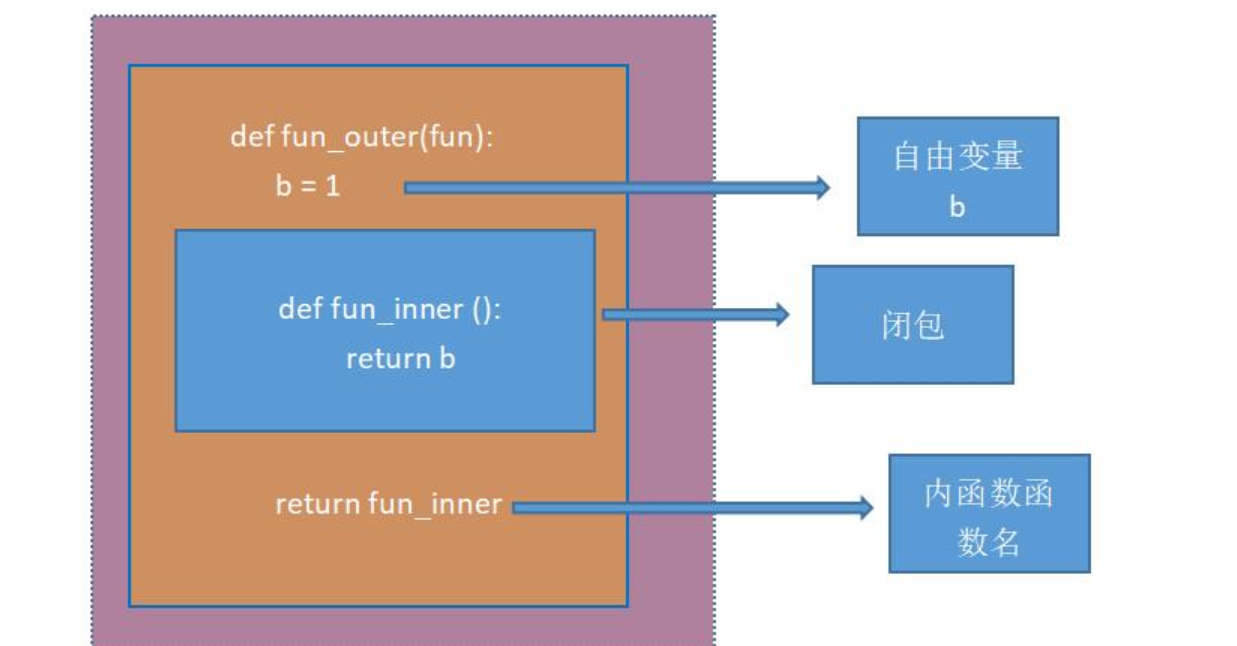

（1）不带参数的函数装饰器（日志打印器）

实现的功能是：在函数执行前，先打印一行日志“Before”，在函数执行完，再打印一行日志“After”。

代码如下：
复制代码

以上代码定义了一个装饰器函数dec1_outer，当我们在func函数前加上@dec1_outer时，就等于给func函数使用了dec1_outer这个装饰器。所以func()在运行前会先将函数名func作为参数传给装饰器函数，这个语句等价于func = dec1_outer（func）。装饰器函数在接收到参数后执行，先返回内函数的函数名dec1_inner，此时18行的func()相当于调用了dec1_inner()，即进行了dec1_inner函数的操作。func函数真正执行的地方则是第9行的那段代码。

以上对装饰器的使用相当于：

1 func = dec1_outer(func)
2 func()

 

（2）带参数的函数装饰器

带参数的函数装饰器常用于定时发送邮件等场景，但是代码过于复杂，不利于讲解。以下代码实现的是在装饰器里传入一个参数，指明国籍，并在函数执行前，用自己国家的母语打一个招呼。

代码如下：
复制代码

 1 #coding=utf-8
 2 # -*- coding=utf-8 -*- 
 3 #带参数的装饰器
 4 def dec2_para(country):
 5     def dec2_outer(func):
 6         def dec2_inner(*args, **kwargs):
 7             if country == "中国":
 8                 print("你好！")
 9             elif country == 'America':
10                 print("Hello!")
11             else:
12                 print("Where are you from?")
13             #函数真正执行的地方
14             func(*args, **kwargs)
15         return dec2_inner
16     return dec2_outer
17 
18 @dec2_para('中国')
19 def Chinese():
20     print("中国")
21 
22 @dec2_para('America')
23 def American():
24     print("America")
25 
26 Chinese()
27 print('----------------------')
28 American()

复制代码

运行结果：

以上代码的装饰器dec2_para采用了两层嵌套，所以Chinese()在运行前会先将‘中国’作为参数传值给dec2_para，装饰器函数在接收到参数后返回dec2_outer函数名。接下来Chinese函数的函数名Chinese会作为参数传给装饰器函数，dec2_outer接收到参数后返回dec2_inner函数名。26行的Chinese()此时相当于调用了dec2_inner()，即进行了dec2_inner函数的操作，dec2_inner会先判断传入的country参数值输出相应的消息。Chinese函数真正执行的地方则是第14行的那段代码。

以上对装饰器的使用相当于：

1 Chinese = dec2_para('中国')(Chinese)
2 Chinese()

4.类装饰器

在我们的代码中如果有出现不同装饰器需要部分功能重叠时，使用类装饰器能使代码更加简洁。比方说有时你只想打印日志到一个文件。而有时你想把引起你注意的问题发送到一个email，同时也保留日志，留个记录。这是一个使用继承的场景，我们可以用类来构建装饰器。

类作为装饰器，需要重写__call__方法。

（1）不带参数的类装饰器：

代码如下：
复制代码

 1 #coding=utf-8
 2 from functools import wraps
 3  
 4 class logit(object):
 5     def __init__(self, logfile='out.log'):
 6         self.logfile = logfile
 7  
 8     def __call__(self, func):
 9         @wraps(func)
10         def wrapped_function(*args, **kwargs):
11             log_string = func.__name__ + " was called"
12             print(log_string)
13             # 打开logfile并写入
14             try:
15                 with open(self.logfile, 'a') as opened_file:
16                 # 现在将日志打到指定的文件
17                     opened_file.write(log_string + '\n')
18             except IOError as e:
19                 print(e)
20             # 现在，发送一个通知
21             self.notify()
22             return func(*args, **kwargs)
23         return wrapped_function
24  
25     def notify(self):
26         # logit只打日志，不做别的
27         pass
28 
29 class email_logit(logit):
30     '''
31     一个logit的实现版本，可以在函数调用时发送email给管理员
32     '''
33     def __init__(self, email='admin@myproject.com', *args, **kwargs):
34         self.email = email
35         super(email_logit, self).__init__(*args, **kwargs)
36  
37     def notify(self):
38         # 发送一封email到self.email
39         # 这里就不做实现了
40         print('send')
41 
42 @email_logit()
43 def myfunc1():
44     print("func1")
45 
46 @logit()
47 def myfunc2():
48     print("func2")
49 
50 myfunc1()
51 print("-----------------------")
52 myfunc2()

复制代码

 运行结果：

文本中的记录：

以上代码，logit是一个类装饰器，它的功能是将函数运行情况记录在out.log文件中。email_logit同样是一个类装饰器，他继承了logit类，并增加了新的功能，即发送email的功能（这部分功能用print('send')代替）。@email_logit相当于 myfun1 = email_logit(myfun1)即，myfun1指向了 email_logit(myfun1)这个对象，func指向了函数myfunc1的函数名。

调用myfun1对象的时候相当于调用类email_logit的__call__方法，调用__call__方法的时候，先执行将函数运行日志写到out.log文件,然后再执行22行的func(*args, **kwargs) ,因为func函数指向的是myfunc1函数,所以func(*args, **kwargs)相当于执行myfun1()。

以上对类装饰器的使用相当于：

1 myfun1 = email_logit(myfun1) 
2 myfun1()

（2）带参数的类装饰器

代码如下：
复制代码

 1 #coding=utf-8
 2 # -*- coding=utf-8 -*- 
 3 #带参数的类装饰器
 4 class dec4_monitor(object):
 5     def __init__(self, level = 'INFO'):
 6         print(level)
 7         self.level = level
 8 
 9     def __call__(self, func):#接收函数
10         def call_inner(*args, **kwargs):
11             print("[%s]:%s is running"%(self.level, func.__name__))
12             func(*args, **kwargs)
13         return call_inner #返回函数
14 
15 @dec4_monitor(level = 'WARNING')
16 def func_warm(warn):
17     print(warn)
18 
19 func_warm("WARNING Message!")

复制代码

运行结果：

类装饰器和函数装饰器一样也可以实现参数传递，上面的代码给装饰器传递了一个level值"WARNING"。@dec4_monitor(level = 'WARNING')相当于 func_warm = dec4_monitor(level = "WARNING")(func_warm)即，func_warm指向了 dec4_monitor(level = "WARNING")(func_warm)这个对象，func指向了函数func_warm的函数名。

调用myfun1对象的时候相当于调用类dec4_monitor的__call__方法，调用__call__方法的时候，输出相关信息[WARNING]:func_warm is running，然后再执行12行的func(*args, **kwargs) ,因为func函数指向的是func_warm函数,所以func(*args, **kwargs)相当于执行func_warm()。

以上对类装饰器的使用相当于：

1 func_warm = dec4_monitor(level = "WARNING")(func_warm)
2 func_warm("WARMING Message")

5.@wraps

Python装饰器（decorator）在实现的时候，被装饰后的函数的函数名等函数属性会发生改变，为了不影响原函数，Python的functools包中提供了一个叫wraps的decorator来消除这样的副作用。写一个decorator的时候，最好在实现之前加上functools的wraps，它能保留原有函数的名称和docstring等属性。

代码如下：
复制代码

 1 #coding=utf-8
 2 # -*- coding=utf-8 -*- 
 3 #@wraps
 4 from functools import wraps
 5 
 6 def decw_outer(func):
 7     @wraps(func)
 8     def decw_inner():
 9         pass
10     return decw_inner
11 
12 def dect_outer(func):
13     def dect_inner():
14         pass
15     return dect_inner
16 
17 @decw_outer
18 def decw_func():
19     pass
20 
21 @dect_outer
22 def dect_func():
23     pass
24 
25 print(decw_func.__name__)
26 
27 print('---------------------')
28 
29 print(dect_func.__name__)

复制代码

运行结果：

通过以上的运行结果我们可以看到，当装饰器函数没有使用@wraps时，被装饰的函数的函数名会发生改变，而使用了@wraps后，被装饰的函数的函数名能变回原来的函数名。

6.Python类中常用的内置装饰器

Python常用的内置装饰器有：@property、@staticmethod、@classmethod和@abstractmethod。

（1）@staticmethod、@classmethod

@staticmethod和@classmethod，它们的作用是可以不需要实例化类，直接用类名.方法名()来调用类里面的方法。但它们也存在一些区别：

        @staticmethod不需要表示自身对象的self和自身类的cls参数，就跟使用函数一样。@classmethod也不需要self参数，但第一个参数需要是表示自身类的cls参数。
        类方法有类变量cls传入，从而可以用cls做一些相关的处理。并且有子类继承时，调用该类方法时，传入的类变量cls是子类，而非父类。

复制代码

 1 class A(object):  
 2     bar = 1  
 3     def foo(self):  
 4         print 'foo'  
 5          
 6     @staticmethod  
 7     def static_foo():  
 8         print 'static_foo'  
 9         print A.bar  
10          
11     @classmethod  
12     def class_foo(cls):  
13         print 'class_foo'  
14         print cls.bar  
15         cls().foo()  
16           
17 A.static_foo() 
18 print('----------------------') 
19 A.class_foo()  

复制代码

运行结果：

 上面的类函数static_foo()和class_foo(cls)因为使用了@staticmethod和@classmethod装饰器而可以直接用类名.方法名()来调用，15行的cls().foo()相当于A().foo()，A()是类A的实例化。

（2）@abstractmethod

Python的abc提供了@abstractmethod装饰器实现抽象方法，使用@abstractmethod装饰器类将不能被实例化。

代码如下：
复制代码

 1 #@abstractmethod
 2 from abc import abstractmethod,ABCMeta
 3 
 4 class Animal():
 5     
 6     __metaclass__ = ABCMeta
 7     @abstractmethod
 8     def eat(self):
 9         pass
10 
11 
12 class Person(Animal):
13 
14     def eat(self):
15         print('eat thing')
16 
17 
18 class Cat(Animal):
19     pass
20 
21 
22 #a = Animal()
23 
24 b = Person()
25 b.eat()
26 
27 #c = Cat()

复制代码

运行结果：

基类Animal的eat方法被@abstractmethod装饰了，所以Animal不能被实例化；子类Dog没有实现基类的eat方法也不能被实例化；子类Person实现了基类的抽象方法eat所以能实例化。当Animal和Cat类被实例化是会报如下错误：

（3）@property

既要保护类的封装特性，又要让开发者可以使用“对象.属性”的方式操作类属性，Python 提供了 @property 装饰器。通过 @property 装饰器，可以直接通过方法名来访问方法，不需要在方法名后添加一对“（）”小括号。

比如以下代码：

 
复制代码

 1 #coding=utf-8
 2 class Student(object):
 3     def __init__(self, name, age=None):
 4         self.name = name
 5         self.age = age
 6 
 7 class Studentlimit(object):
 8     def __init__(self, name):
 9         self.name = name
10 
11     def set_age(self, age):
12         if not isinstance(age, int):
13             raise ValueError('输入不合法：年龄必须为数值!')
14         if not 0 < age < 100:
15             raise ValueError('输入不合法：年龄范围必须0-100')
16         self._age=age
17 
18     def get_age(self):
19         return self._age
20 
21     def del_age(self):
22         self._age = None
23 
24 # 实例化
25 xm = Student("小明")
26 xh = Studentlimit("小华")
27 
28 # 添加属性
29 xm.age = 25
30 #xm.age = -5
31 xh.set_age(26)
32 #xh.set_age(-5)
33 # 查询属性
34 print(xm.age)
35 print(xh.get_age())
36 # 删除属性
37 del xm.age
38 xh.del_age()

复制代码

在代码中我设置了两个类这两个类的作用都是在类实例化以后增加age属性。

Student类可以使用对象.属性的方法赋值，但是对于赋的值没有办法判定合法性。Studentlimit类可以判定赋值的合法性但是不能使用对象.属性的方法赋值。

所以为了解决这个难题，Python 提供了 @property 装饰器。

在使用@property以后的代码如下：
复制代码

 1 #coding=utf-8
 2 # -*- coding=utf-8 -*- 
 3 #@property
 4 class Student(object):
 5     def __init__(self, name):
 6         self.name = name
 7         self.name = None
 8 
 9     @property
10     def age(self):
11         return self._age
12 
13     @age.setter
14     def age(self, value):
15         if not isinstance(value, int):
16             raise ValueError('输入不合法：年龄必须为数值!')
17         if not 0 < value < 100:
18             raise ValueError('输入不合法：年龄范围必须0-100')
19         self._age=value
20 
21     @age.deleter
22     def age(self):
23         del self._age
24 
25 xiaoming = Student("小明")
26 # 设置属性
27 xiaoming.age = 25
28 
29 # 查询属性
30 print(xiaoming.age)
31 print(xiaoming.name)
32 
33 #更改属性
34 xiaoming.age = 22
35 
36 # 查询属性
37 print(xiaoming.age)
38 
39 # 删除属性
40 del xiaoming.age
41 print(xiaoming.age)

复制代码

此时，我们既可以使用使用对象.属性的方法赋值，而且对于赋的值也可以判定其判定合法性。

In [6]:
def logging(func):
    def log_function_called():
        print(f'{func} called.')
        func()
    return log_function_called

In [9]:
def my_name():
    print('chris')
    def friends_name():
        print('naruto')
my_name()
friends_name()
#=> chris 

chris


NameError: name 'friends_name' is not defined

In [10]:
@logging
def my_name():
 print('chris')@logging
def friends_name():
 print('naruto')my_name()
friends_name()
#=> <function my_name at 0x10fca5a60> called.
#=> chris
#=> <function friends_name at 0x10fca5f28> called.
#=> naruto

SyntaxError: invalid syntax (<ipython-input-10-7a087ca67feb>, line 5)